In [1]:
import os 
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [2]:
os.getcwd() #same as pwd command

'/workspace/AI_Data_Science/Data-science/ml-algorithms'

In [3]:
df = pd.read_csv('ToyotaCorolla.csv')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
# check data number and variable numbers
nCar = df.shape[0]
nVar = df.shape[1]
print(nCar, nVar)

1436 37


In [5]:
# convert categorical type variable into binary type variable 
df.Fuel_Type.unique()
dummy_p = np.repeat(0, nCar)
dummy_d = np.repeat(0, nCar)
dummy_c = np.repeat(0, nCar)

In [6]:
dummy_p

array([0, 0, 0, ..., 0, 0, 0])

In [7]:
# substitute after index slicing
p_idx = np.array(df.Fuel_Type == 'Petrol')
d_idx = np.array(df.Fuel_Type == 'Diesel')
c_idx = np.array(df.Fuel_Type == 'CNG')

In [8]:
p_idx

array([False, False, False, ...,  True,  True,  True])

In [9]:
dummy_p[p_idx] = 1
dummy_d[d_idx] = 1
dummy_c[c_idx] = 1

In [10]:
dummy_p

array([0, 0, 0, ..., 1, 1, 1])

### add dummy variable and delete unnecessary variables

In [11]:
fuel = pd.DataFrame({'Petrol': dummy_p, 'Diesel': dummy_d, 'CNG':dummy_c})

In [12]:
fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [13]:
df_ = df.drop(['Id', 'Model', 'Fuel_Type'], axis=1, inplace=False)
mir_data = pd.concat((df_, fuel), 1)
mir_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


In [14]:
mir_data.columns.difference(['Price'])

Index(['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic',
       'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider',
       'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders',
       'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color',
       'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Mistlamps',
       'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio',
       'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc'],
      dtype='object')

In [15]:
# add bias
mir_data2 = sm.add_constant(mir_data, has_constant='add')
mir_data2 

/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1.0,7500,69,12,1998,20544,86,1,0,1300,...,0,1,1,1,0,0,0,1,0,0
1432,1.0,10845,72,9,1998,19000,86,0,0,1300,...,0,0,1,1,0,0,0,1,0,0
1433,1.0,8500,71,10,1998,17016,86,0,0,1300,...,0,0,0,1,0,0,0,1,0,0
1434,1.0,7250,70,11,1998,16916,86,1,0,1300,...,0,0,0,1,0,0,0,1,0,0


### X, Y (target variable) split into train and validation data

In [16]:
feature_columns = list(mir_data.columns.difference(['Price']))

X = mir_data[feature_columns]
y = mir_data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size = 0.3)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 36) (431, 36) (1005,) (431,)


In [17]:
# train the MLR / fit regression mode
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

In [18]:
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     292.6
Date:                Sun, 02 Aug 2020   Prob (F-statistic):               0.00
Time:                        13:23:21   Log-Likelihood:                -8456.9
No. Observations:                1005   AIC:                         1.698e+04
Df Residuals:                     971   BIC:                         1.715e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -225.7499    134.763     -1.675      0.094    -490.210      38.710
Age_08_04         -122.5806      4.142    -29.592      0.000    -130.710    -114.452
Airbag_1           230.6215    260.723      0.885      0.377    -281.023     742.266
Airbag_2           -12.4632    139.958     -0.089      0.929    -287.118     262.191
Airco              234.5289     95.933      2.445      0.015      46.269     422.788
Automatic          490.1153    157.023      3.121      0.002     181.972     798.259
Automatic_airco   2194.4728    193.789     11.324      0.000    1814.180    2574.765
BOVAG_Guarantee    444.3319    138.487      3.208      0.001     172.563     716.101
Backseat_Divider  -235.7247    140.476     -1.678      0.094    -511.395      39.946
Boardcomputer     -290.7776    124.035     -2.344      0.019    -534.185     -47.371
CD_Player          126.0101    104.601      1.205      0.229     -79.260     331.280
CNG              -1198.3091    230.474     -5.199      0.000   -1650.594    -746.024
Central_Lock       114.0164    151.505      0.753      0.452    -183.298     411.330
Cylinders           -0.0311      0.002    -13.266      0.000      -0.036      -0.026
Diesel             333.8922    189.884      1.758      0.079     -38.739     706.523
Doors               89.2191     42.752      2.087      0.037       5.321     173.117
Gears               59.2110    203.573      0.291      0.771    -340.283     458.705
Guarantee_Period    59.1566     13.986      4.230      0.000      31.711      86.603
HP                  27.6285      3.658      7.553      0.000      20.450      34.807
KM                  -0.0154      0.001    -11.156      0.000      -0.018      -0.013
Met_Color          -81.7022     79.825     -1.024      0.306    -238.352      74.947
Metallic_Rim       154.5132    100.666      1.535      0.125     -43.035     352.061
Mfg_Month          -90.0613     11.072     -8.134      0.000    -111.790     -68.333
Mfg_Year             2.1432      0.838      2.557      0.011       0.499       3.788
Mfr_Guarantee      226.7779     78.034      2.906      0.004      73.642     379.913
Mistlamps          -44.4393    116.064     -0.383      0.702    -272.204     183.326
Petrol             864.4091    200.447      4.312      0.000     471.050    1257.768
Power_Steering     -60.7700    291.176     -0.209      0.835    -632.177     510.637
Powered_Windows    260.1897    152.265      1.709      0.088     -38.617     558.997
Quarterly_Tax       13.4287      1.959      6.854      0.000       9.584      17.274
Radio              447.8568    661.197      0.677      0.498    -849.683    1745.397
Radio_cassette    -599.9731    661.186     -0.907      0.364   -1897.492     697.545
Sport_Model        377.1428     93.733      4.024      0.000     193.199     561.086
Tow_Bar           -167.

### check VIF multicorrelation

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
# x_data4 = x_data3.drop('RM', axis=1)
vif['VIF Factor'] = [variance_inflation_factor(
    mir_data.values, i) for i in range(mir_data.shape[1])]
vif['features'] = mir_data.columns
vif

/usr/local/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,VIF Factor,features
0,10.953474,Price
1,inf,Age_08_04
2,inf,Mfg_Month
3,inf,Mfg_Year
4,2.400334,KM
5,2.621514,HP
6,1.143778,Met_Color
7,1.121303,Automatic
8,1.258641,cc
9,1.352288,Doors


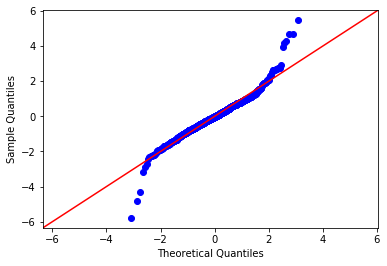

In [21]:
#check training data
res = fitted_full_model.resid

fig = sm.qqplot(res, fit=True, line='45')

Text(0, 0.5, 'Residual')

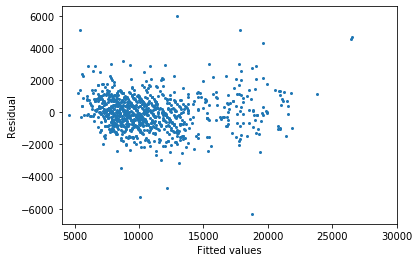

In [22]:
# residual pattern check
pred_y = fitted_full_model.predict(train_x)
import matplotlib.pyplot as plt
fig = plt.scatter(pred_y, res, s=4)
plt.xlim(4000, 30000)
plt.xlim(4000, 30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

In [23]:
# predict validation data
pred_y2 = fitted_full_model.predict(test_x)

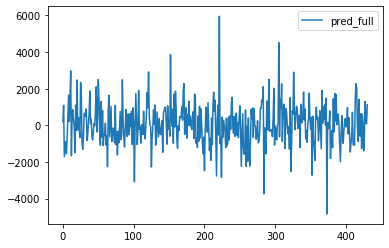

In [26]:
## residual plot
plt.plot(np.array(test_y - pred_y2), label='pred_full')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
## MSE performance
mean_squared_error(y_true=test_y, y_pred = pred_y2)

1312193.3829209383